In [ ]:
!pip install fastbook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.8 MB/s eta 0:00:00


In [ ]:
import fastbook

In [ ]:
fastbook.setup_book()

Mounted at /content/gdrive


In [ ]:
#!pip install fastbook
from fastbook import *
from fastai.vision.all import *
import numpy as np
import PIL
from os import *
from fastai import *
from fastai.tabular import *
from fastai.vision import *
import fastai.vision as vision
#from fastai.vision.widgets import *
#from utils import *

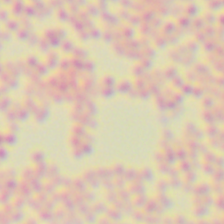

In [ ]:
pictu = "/content/Veionella_sample.png"
dest = Path(pictu)
im = Image.open(dest)
im.to_thumb(2048,1532)

In [ ]:
image_files = get_image_files(r"/content/images")
print(image_files)

[Path('/content/images/lp1.png'), Path('/content/images/lj.jpeg'), Path('/content/images/l.jpeg'), Path('/content/images/bf.jpeg'), Path('/content/images/lp.jpeg'), Path('/content/images/ca.jpeg')]


In [ ]:
from sklearn.model_selection import train_test_split

# Load all image files
all_image_files = get_image_files(r"/content/images")
indices = list(range(len(all_image_files)))

# Split data manually
train_indices, valid_indices = train_test_split(indices, test_size=0.2, random_state=42)

# Create DataLoaders based on the manual split
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=lambda x: [all_image_files[i] for i in x],  # Get file paths based on indices
    splitter=IndexSplitter(valid_indices),
    get_y=parent_label,
).dataloaders(train_indices)

In [ ]:
path = r"/content/images"

print(len(dls.train))
print(len(dls.valid))
#dls.show_batch(max_n=6)

0
1


In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(460),  # Resize all images to a common size
).dataloaders(path)
dls.show_batch(max_n=6)

ValueError: ignored

In [ ]:
##loading my pretrained pth didnt work bc apparently it cant find the file on kaggle?
#Altlearn = vision_learner(dls, resnet50, metrics=error_rate)
#Altlearn.load(Path("../input/badbacteriamodel/OriginalModel"))

In [ ]:
from fastai.vision.all import cnn_learner, resnet34, accuracy

learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(epochs=5)


epoch,train_loss,valid_loss,accuracy,time
0,nan,0.000000,1.000000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,nan,0.000000,1.000000,00:00
1,nan,0.000000,1.000000,00:01
2,nan,0.000000,1.000000,00:00
3,nan,0.000000,1.000000,00:00
4,nan,0.000000,1.000000,00:00


In [ ]:
learn = vision_learner(dls, resnet50, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time


/usr/local/lib/python3.10/dist-packages/fastprogress/fastprogress.py:73: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


RuntimeError: ignored

In [ ]:
learn.lr_find()

ZeroDivisionError: ignored

In [ ]:
##cleaning bad images (bc my imput will definetely be of the same quality)
##didnt work due to presumably package issues
#cleaner = ImageClassifierCleaner(learn)
#cleaner

In [ ]:
#retraining w different learning rate at the loss valley
learn.fit_one_cycle(10, 2e-06, cbs=[ShowGraphCallback()])

epoch,train_loss,valid_loss,accuracy,time


ValueError: ignored

looks like the model is slightly overfitting and the refinement epochs didnt do too much to help. However, its such a small difference that it should be fine. We can investigate this more as we evaluate the model here:

epoch,train_loss,valid_loss,accuracy,time
0,nan,0.000000,1.000000,00:01


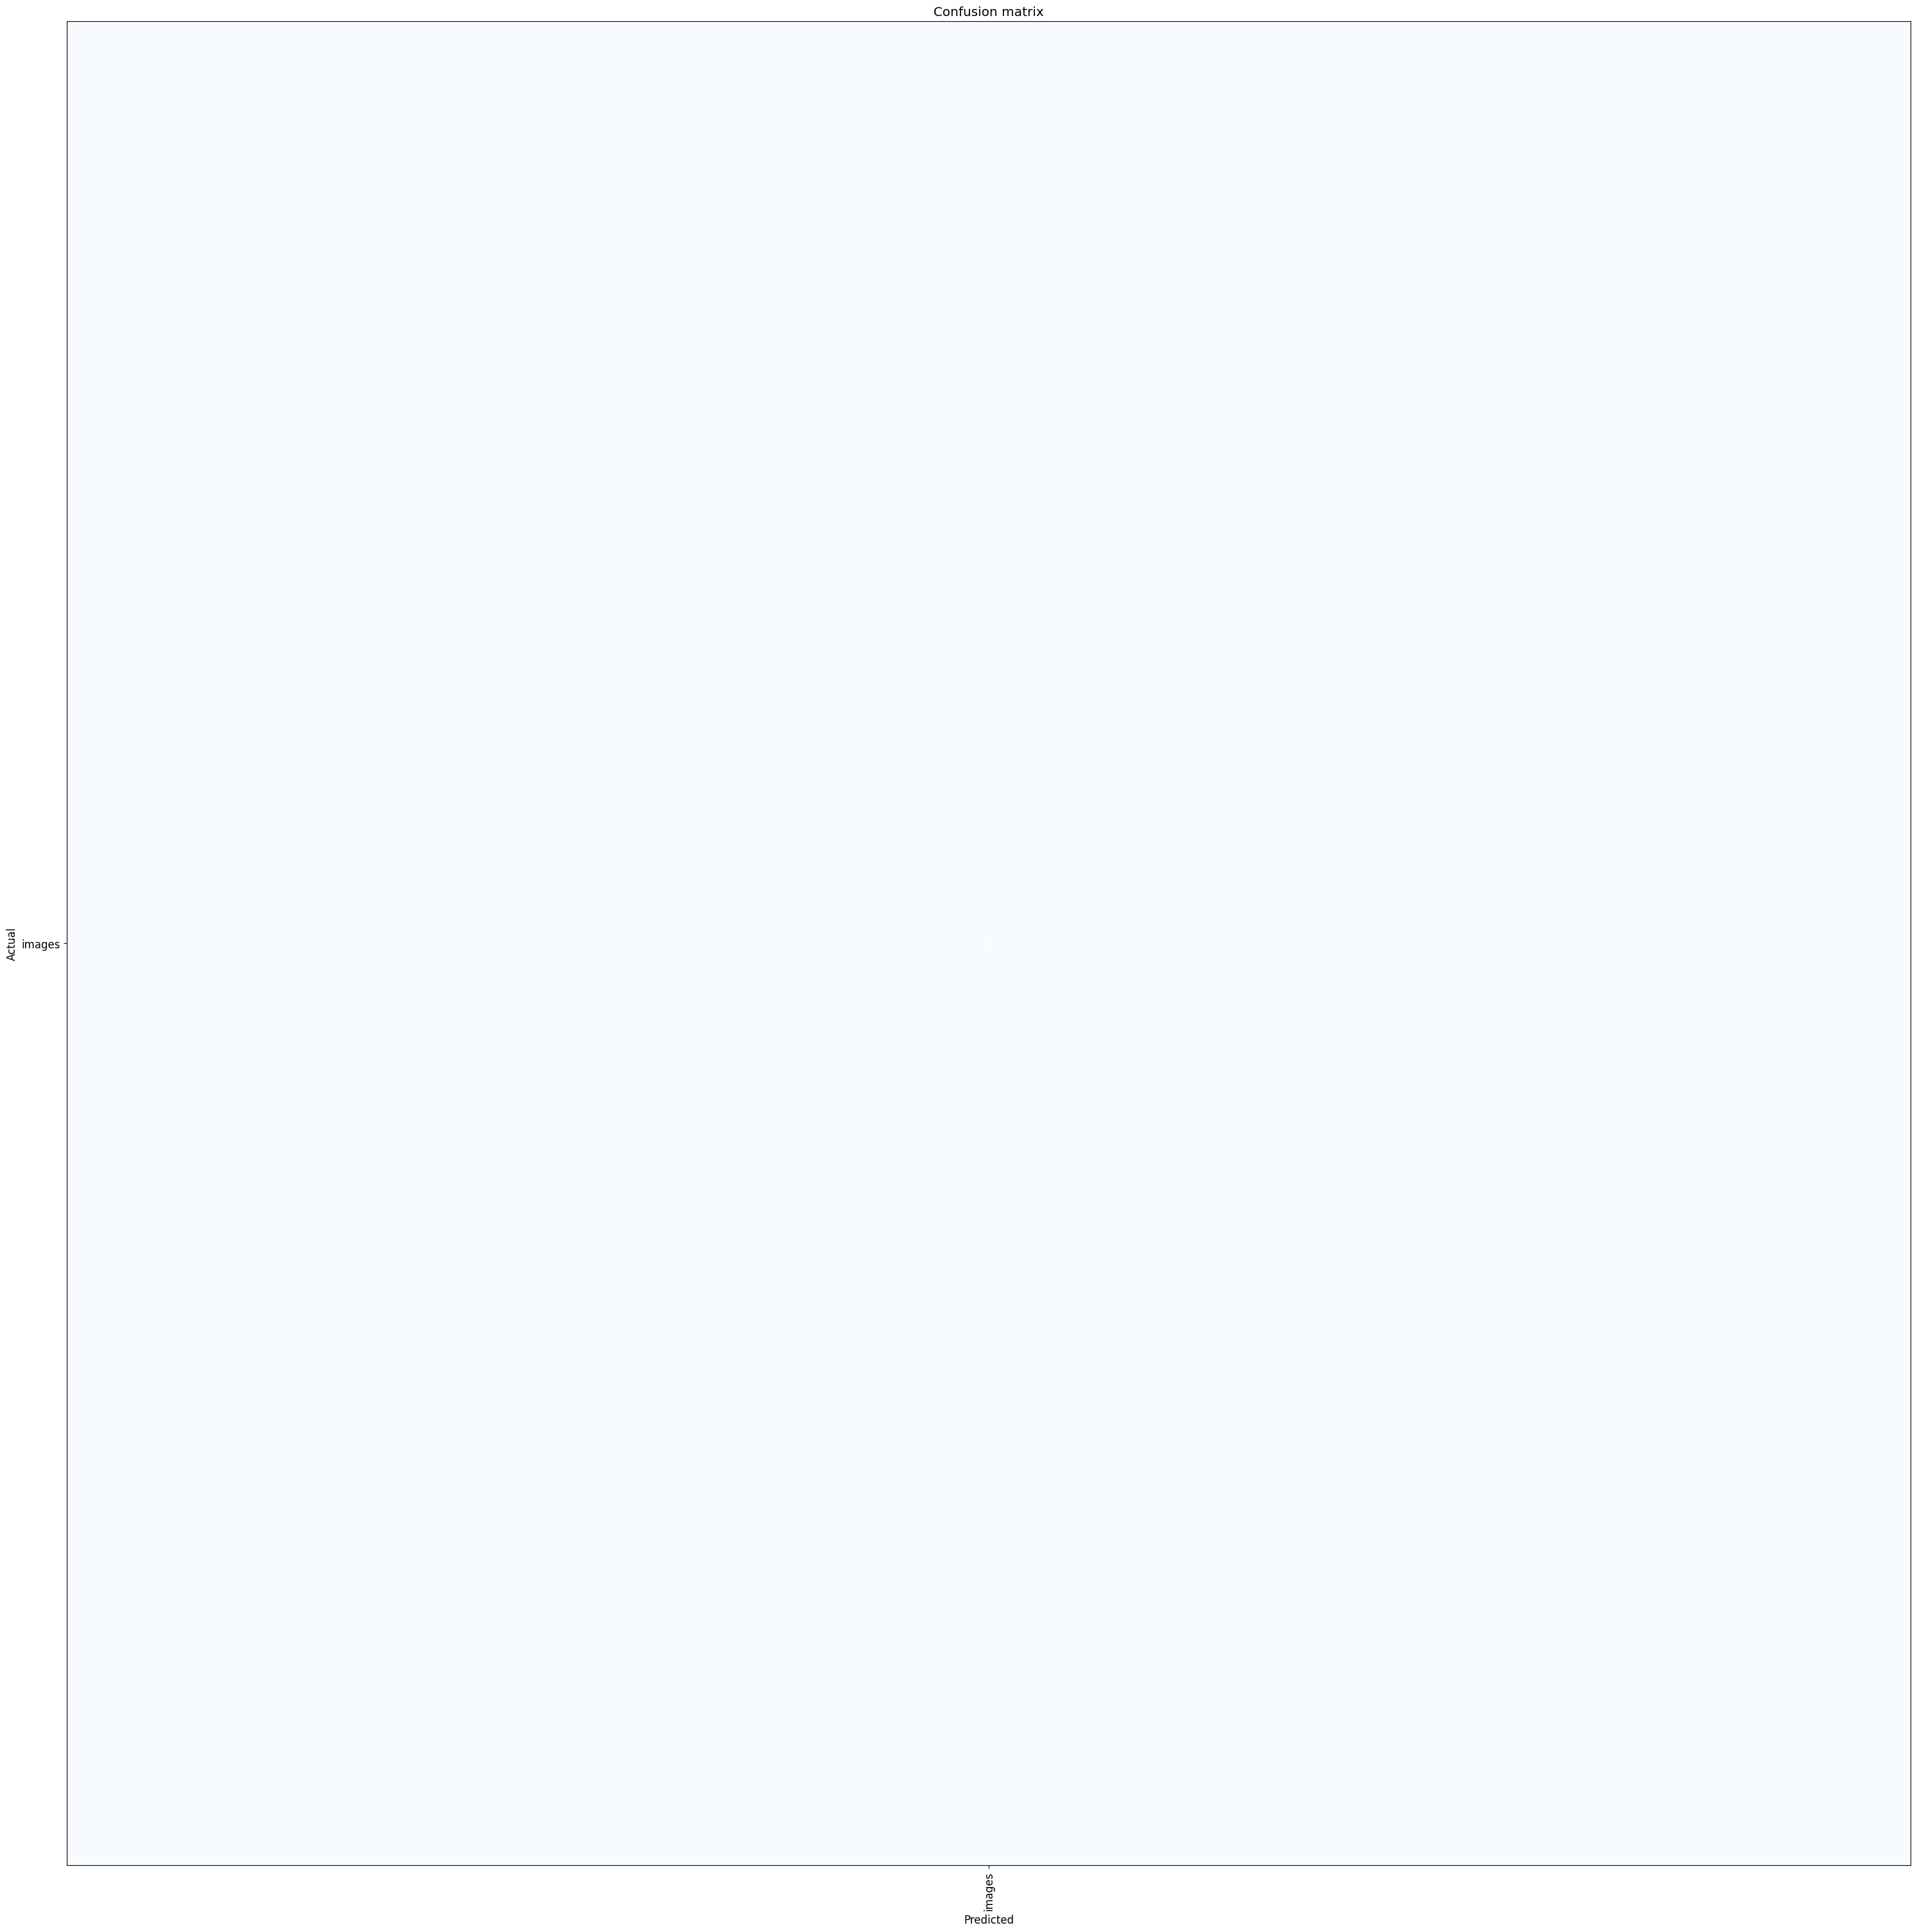

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(30,30), dpi=100)

In [ ]:
#plotting the images the model had the most trouble with
interp.plot_top_losses(6, figsize=(24,24))

RuntimeError: ignored

It can be seen here the model seems to do surprisingly well, and the images it struggles on are either almost blank or the strains are extremely similar phenotypically.

In [ ]:
#!pip install fastai2
from fastai2.vision.widgets import *
cleaner = ImageClassifierCleaner(learn)
cleaner

#RuntimeError: tensor.H is only supported on matrices (2-D tensors). Got 1-D tensor.

ModuleNotFoundError: No module named 'fastai2'

In [ ]:
#functions for trying out the initial model on my images(ignore)
def identifyBacteria(impath):
    is_bacteria,_,probs = learn.predict(PILImage.create(impath))
    print(f"This is a: {is_bacteria}.")
    print(f"Probability: {maximum(probs)}")

In [ ]:
testing = "../input/smalldibas/cropped/Lactobacillus.rhamnosus/img15286.png"
learn.predict(PILImage.create(testing))

('Lactobacillus.rhamnosus',
 TensorBase(19),
 TensorBase([1.9593e-08, 6.2731e-08, 7.3907e-09, 2.9837e-08, 3.1281e-09, 4.3568e-08, 4.1959e-09, 4.4326e-08, 3.9232e-08, 5.9301e-07, 2.4163e-09, 1.0051e-06, 1.0921e-08, 1.5125e-05, 1.8590e-07, 6.0348e-07,
         1.7772e-05, 3.4312e-07, 6.0930e-07, 9.9996e-01, 8.2426e-11, 3.2116e-09, 3.4022e-08, 1.0314e-08, 9.4984e-07, 2.5658e-09, 8.0426e-07, 1.5344e-07, 8.6923e-08, 3.3632e-08, 5.1917e-09, 1.1836e-08,
         1.1010e-07]))

In [ ]:
#exporting
learn.export('Bacteria-Classifier')